# SAIL Radiosonde Data

This notebook is designed to investigate recent 2022 winter radiosonde data from SAIL launched from Gothic, CO over a variety of conditions

The `act` package is required for this notebook to download and easily visualize the data. Check out the documentation [here](https://arm-doe.github.io/ACT/index.html).

In [1]:
# Import packages to be used
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import act

In [2]:
# Personal access necessary for downloading from the ARM portal, need an account to due so
username = 'dlhogan@uw.edu'
token = '7f1c805e6ae94c21'
outpath = '/storage/dlhogan/sos/data'

In [3]:
radiosonde ='gucsondewnpnM1.b1'
start = '2021-12-20'
end = '2022-03-1' 

In [4]:
# Download SAIL sonde data
if not os.path.exists(outpath+'/radiosonde'):
    print('Downloading Data...')
    act.discovery.download_data(username, token, radiosonde,
                                start, end, output=outpath+'/radiosonde')
    print('Success! Data located here:')
else: print(f'Data already downloaded. Located here: {outpath}/radiosonde')

Data already downloaded. Located here: /storage/dlhogan/sos/data/radiosonde


In [4]:
# Open all downloaded files
sonde_ds = act.io.armfiles.read_netcdf(os.path.join(outpath,f'radiosonde/{radiosonde}.*'))

In [5]:
# Don't need to worry about this
kappa = 0.286
sonde_ds = sonde_ds.assign(potential_T = (273.15 + sonde_ds.where(sonde_ds['qc_tdry'] == 0)['tdry']) * (1000 / sonde_ds.where(sonde_ds['qc_tdry'] == 0)['pres'])**kappa - 273.15)
sonde_ds['potential_T'].attrs = {'units':'degC'}

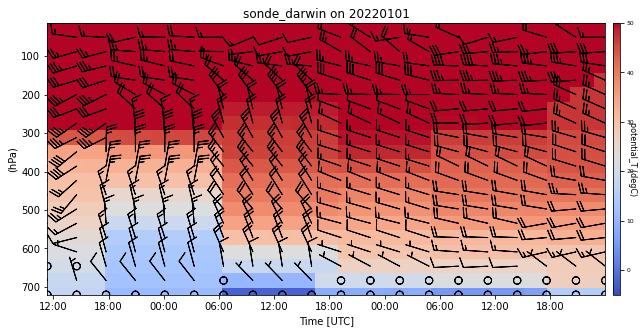

In [22]:
# Don't need to worry about this
BarbDisplay = act.plotting.TimeSeriesDisplay(
    {'sonde_darwin': sonde_ds.sel(time=slice('2022-01-01','2022-01-03'))}, figsize=(10, 5))
BarbDisplay.plot_time_height_xsection_from_1d_data('potential_T', 'pres',
                                                   cmap='coolwarm',
                                                   vmin=-5, vmax=50,
                                                   num_time_periods=25)
BarbDisplay.plot_barbs_from_spd_dir('deg', 'wspd', 'pres',
                                    num_barbs_x=20)
plt.show()

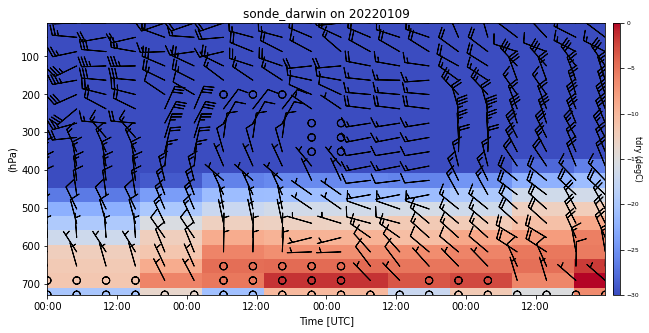

In [166]:
# Don't need to worry about this
BarbDisplay = act.plotting.TimeSeriesDisplay(
    {'sonde_darwin': sonde_ds.sel(time=slice('2022-01-09','2022-01-12'))}, figsize=(10, 5))
BarbDisplay.plot_time_height_xsection_from_1d_data('tdry', 'pres',
                                                   cmap='coolwarm',
                                                   vmin=-30, vmax=0,
                                                   num_time_periods=10)
BarbDisplay.plot_barbs_from_spd_dir('deg', 'wspd', 'pres',
                                    num_barbs_x=20)
plt.show()

In [19]:
%matplotlib inline

In [58]:
def plot_sonde(date,variable, limits, title):
    # Apply date filter
    sonde_temp_profile = sonde_ds.sel(time=slice(f'{date} 09',f'{date} 15')).resample(time='min').mean()
        
    # Plot data
    fig, axs = plt.subplots(ncols=2, figsize=(10,5), tight_layout=True)
    axs[0].plot(sonde_temp_profile[variable],sonde_temp_profile['alt'])
    axs[0].set_xlim(limits[0],limits[1])
    axs[0].set_ylim(3000,10000)
    axs[0].set_xlabel('Relative Humidity (%)');
    axs[0].set_ylabel('Altitude (m)');
    axs[0].set_title(f'{variable.upper()} with Altitude');

    axs[1].plot(sonde_temp_profile[variable],sonde_temp_profile['pres'])
    axs[1].set_xlim(limits[0],limits[1])
    axs[1].set_ylim(725,350)
    axs[1].set_xlabel('Relative Humidity (%)');
    axs[1].set_ylabel('Pressure (mbar)');
    axs[1].set_title(f'{variable.upper()} with Pressure');

    fig.suptitle(f'{title} on {date}')
    return

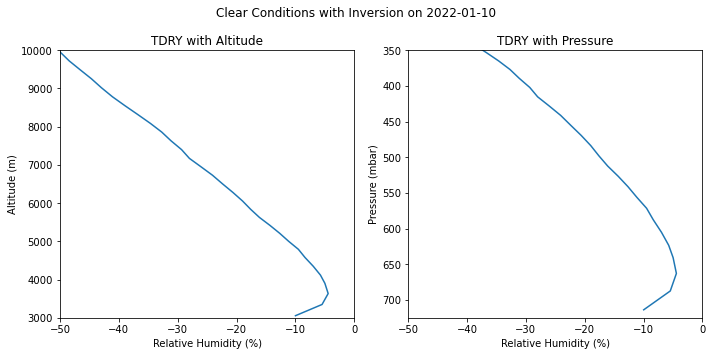

In [59]:
# Apply date filter
date = '2022-01-10'
plot_sonde(date, 'tdry', (-50,0), title='Clear Conditions with Inversion')

# Apply date filter
date = '2022-01-03'
plot_sonde(date, 'tdry', (-50,0), title='Clear Conditions with Inversion')

# Apply date filter
date = '2021-12-26'
plot_sonde(date, 'tdry', (-50,0), title='Stormy/Cloudy Conditions without Inversion')

# Apply date filter
date = '2022-01-06'
plot_sonde(date, 'tdry', (-50,0), title='Stormy/Cloudy Conditions without Inversion')

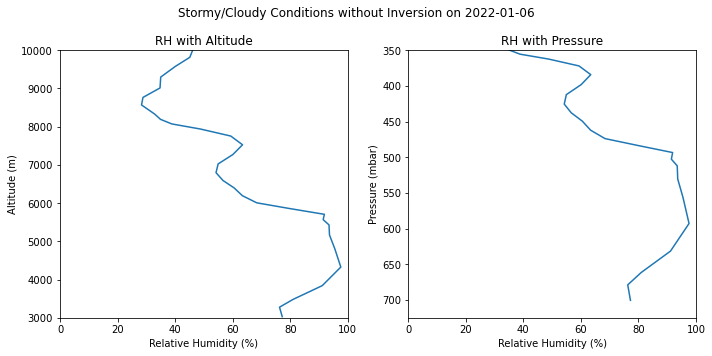

In [64]:
# Apply date filter
date = '2022-01-06'
plot_sonde(date, 'rh', (0,100), title='Stormy/Cloudy Conditions without Inversion')

# Apply date filter
date = '2021-12-26'
plot_sonde(date, 'rh', (0,100), title='Stormy/Cloudy Conditions without Inversion')

# Apply date filter
date = '2022-01-10'
plot_sonde(date, 'rh', (0,100), title='Clear Conditions with Inversion')